# Analysis Data of Netflix 2021 Movie Dataset

In [1]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [2]:
df = pd.read_excel('data/Netflix Dataset Latest 2021.xlsx')
df.head().transpose()

,0,1,2,3,4
Title,Lets Fight Ghost,HOW TO BUILD A GIRL,The Con-Heartist,Gleboka woda,Only a Mother
Genre,"Crime, Drama, Fantasy, Horror, Romance",Comedy,"Comedy, Romance",Drama,Drama
Tags,"Comedy Programmes,Romantic TV Comedies,Horror ...","Dramas,Comedies,Films Based on Books,British","Romantic Comedies,Comedies,Romantic Films,Thai...","TV Dramas,Polish TV Shows,Social Issue TV Dramas","Social Issue Dramas,Dramas,Movies Based on Boo..."
Languages,"Swedish, Spanish",English,Thai,Polish,Swedish
Series or Movie,Series,Movie,Movie,Series,Movie
Hidden Gem Score,4.3,7.0,8.6,8.7,8.3
Country Availability,Thailand,Canada,Thailand,Poland,"Lithuania,Poland,France,Italy,Spain,Greece,Bel..."
Runtime,< 30 minutes,1-2 hour,> 2 hrs,< 30 minutes,1-2 hour
Director,Tomas Alfredson,Coky Giedroyc,Mez Tharatorn,NaN,Alf Sjöberg
Writer,John Ajvide Lindqvist,Caitlin Moran,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",NaN,Ivar Lo-Johansson


In [3]:
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [4]:
df.shape

(9425, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Title                  9425 non-null   object        
 1   Genre                  9400 non-null   object        
 2   Tags                   9389 non-null   object        
 3   Languages              9266 non-null   object        
 4   Series or Movie        9425 non-null   object        
 5   Hidden Gem Score       9415 non-null   float64       
 6   Country Availability   9414 non-null   object        
 7   Runtime                9424 non-null   object        
 8   Director               7120 non-null   object        
 9   Writer                 7615 non-null   object        
 10  Actors                 9314 non-null   object        
 11  View Rating            6827 non-null   object        
 12  IMDb Score             9417 non-null   float64       
 13  Rot

In [6]:
df.isnull().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 159
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Awards Nominated For     3049
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Netflix Link                0
IMDb Link                 324
Summary                     5
IMDb Votes                 10
Image                       0
Poster                    938
TMDb Trailer                0
Trailer Site                1
dtype: int64

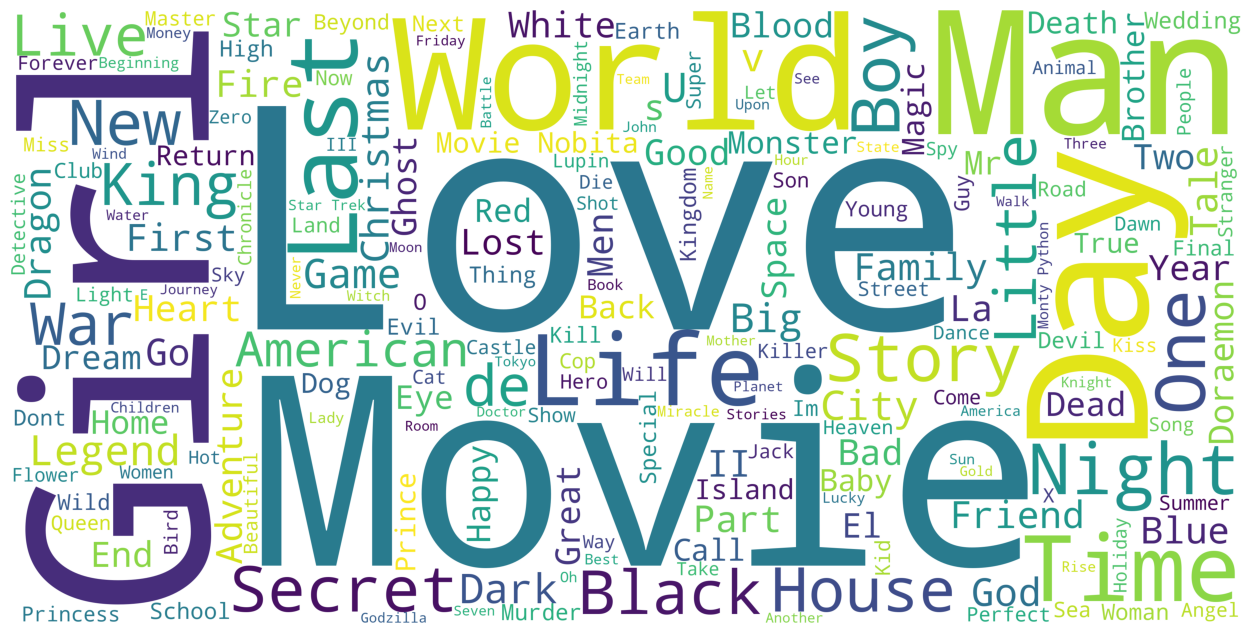

In [7]:
df['Title'] = df['Title'].astype('str')
title_corpus = ' '.join(df['Title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=[16, 8])
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

# Number of Movies/Series based on Attribute

In [30]:
df['year'] = pd.to_datetime(df['Netflix Release Date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9420    2015
9421    2015
9422    2015
9423    2015
9424    2015
Name: year, Length: 9425, dtype: object

## Movie or Series

In [8]:
df[df['Series or Movie'].isnull()].shape

(0, 30)

In [9]:
df['Series or Movie']

0       Series
1        Movie
2        Movie
3       Series
4        Movie
         ...  
9420     Movie
9421     Movie
9422     Movie
9423     Movie
9424    Series
Name: Series or Movie, Length: 9425, dtype: object

In [10]:
sm_df = pd.DataFrame(df['Series or Movie'].value_counts())
sm_df.columns = ['Number']
sm_df.head()

,Number
Movie,7010
Series,2415


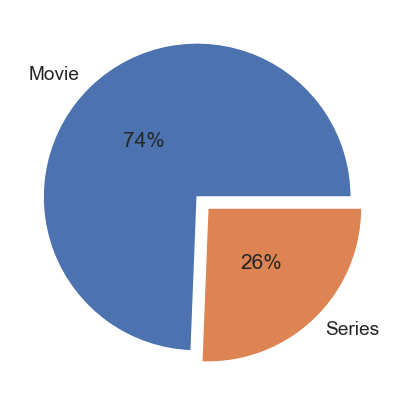

In [11]:
plt.figure(figsize=(12,5))
plt.pie(x=sm_df['Number'], labels=sm_df.index, autopct='%.0f%%', explode=[0.05]*2, pctdistance=0.5)
plt.show()

## Popular Genre

In [12]:
df[df['Genre'].isnull()].shape

(25, 30)

In [13]:
df['Genre'] = df['Genre'].str.replace(" ", "")
df['Genre']

0       Crime,Drama,Fantasy,Horror,Romance
1                                   Comedy
2                           Comedy,Romance
3                                    Drama
4                                    Drama
                       ...                
9420                Comedy,Fantasy,Romance
9421                           Documentary
9422                     Documentary,Music
9423                                Comedy
9424               Animation,Comedy,Family
Name: Genre, Length: 9425, dtype: object

In [14]:
df['Genre'] = df['Genre'].fillna('Other')
gen = df['Genre'].str.split(',', expand=True).values.tolist()

In [15]:
for i in range(len(gen)):
    df['Genre'][i] = gen[i]
df['Genre']

0       [Crime, Drama, Fantasy, Horror, Romance, None,...
1       [Comedy, None, None, None, None, None, None, N...
2       [Comedy, Romance, None, None, None, None, None...
3       [Drama, None, None, None, None, None, None, No...
4       [Drama, None, None, None, None, None, None, No...
                              ...                        
9420    [Comedy, Fantasy, Romance, None, None, None, N...
9421    [Documentary, None, None, None, None, None, No...
9422    [Documentary, Music, None, None, None, None, N...
9423    [Comedy, None, None, None, None, None, None, N...
9424    [Animation, Comedy, Family, None, None, None, ...
Name: Genre, Length: 9425, dtype: object

In [16]:
s = df.apply(lambda x: pd.Series(x['Genre']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [17]:
gen_df = df.drop('Genre', axis=1).join(s)

In [18]:
gr_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
gr_gen.columns = ['Genre', 'Movies']
gr_gen.head(15)

,Genre,Movies
0,Drama,4803
1,Comedy,3305
2,Action,2149
3,Thriller,2071
4,Romance,1812
5,Crime,1512
6,Adventure,1355
7,Fantasy,1228
8,Animation,1173
9,Sci-Fi,955


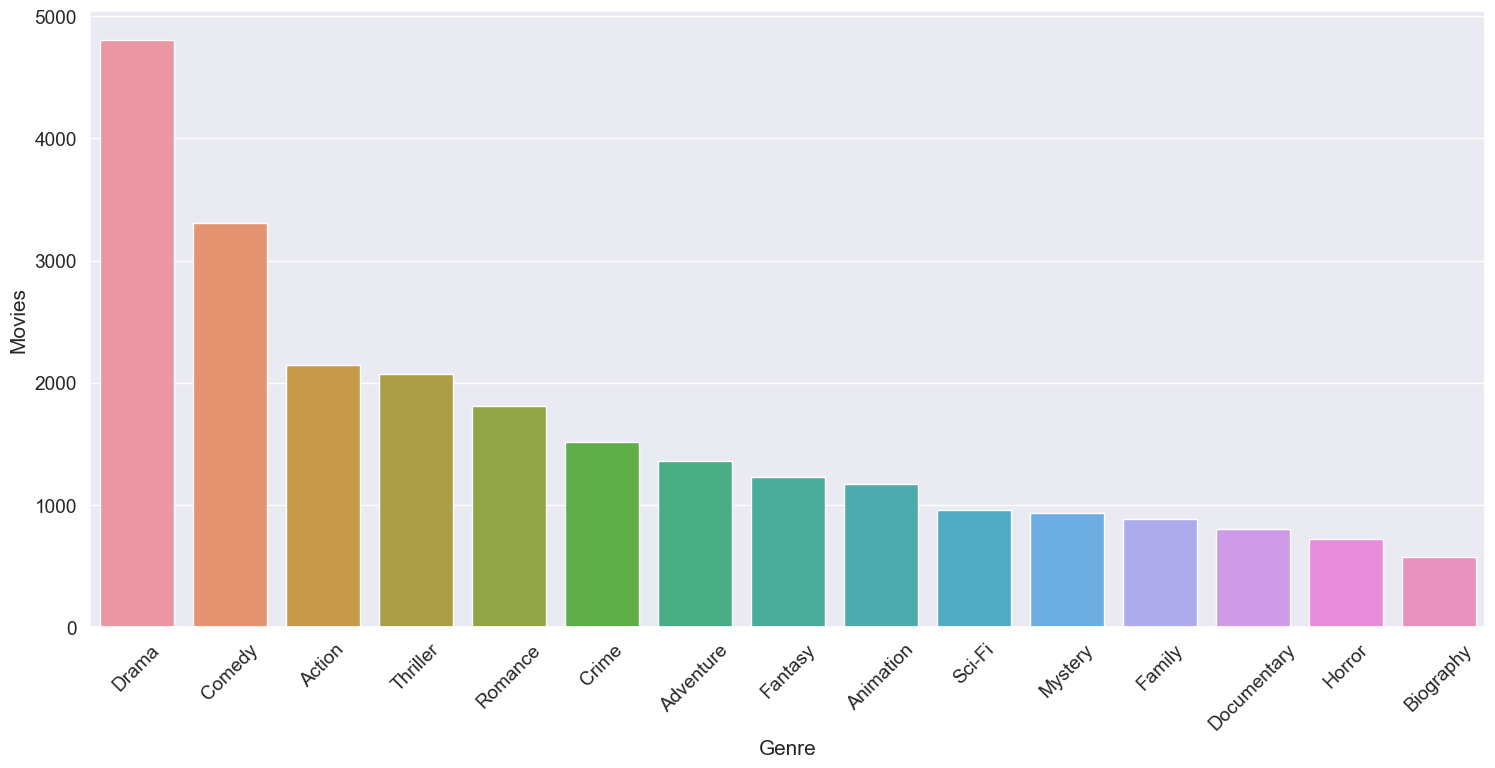

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(x='Genre', y='Movies', data=gr_gen.head(15))
plt.xticks(rotation=45)
plt.show()

<Figure size 640x480 with 0 Axes>

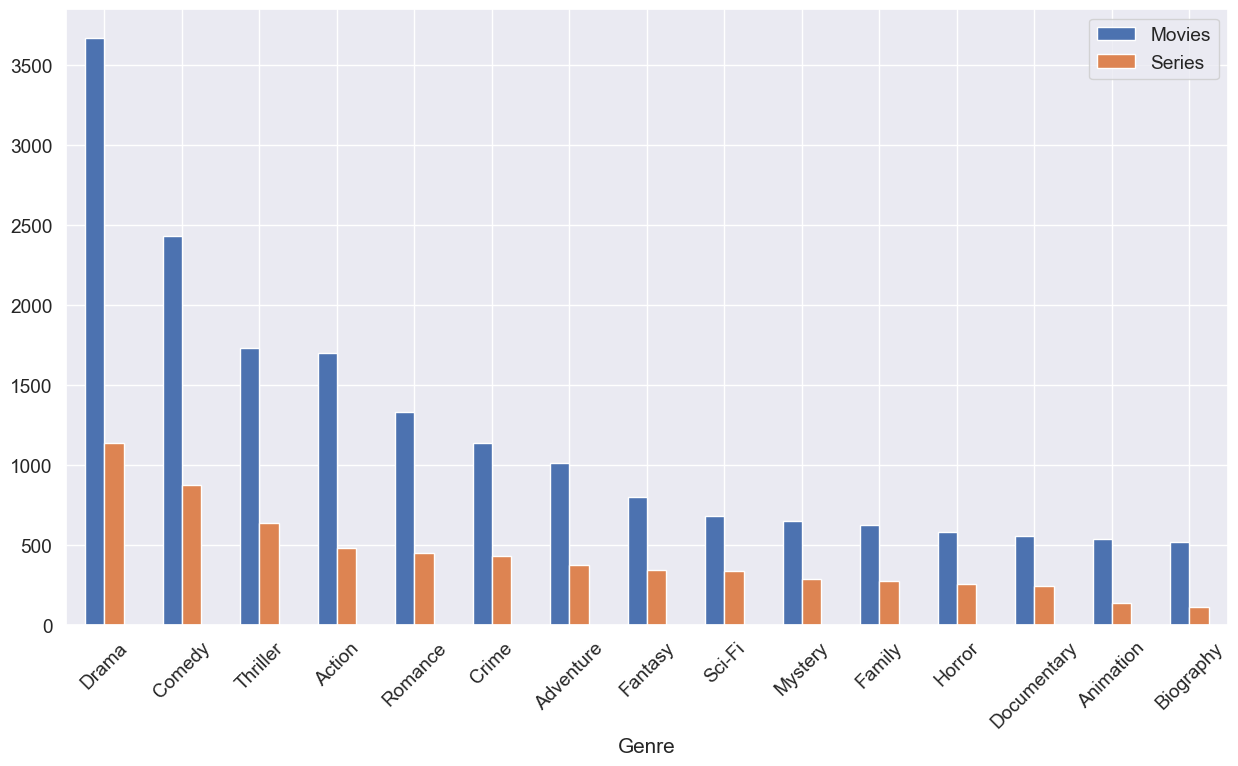

In [27]:
df_series = df[(df['Series or Movie']=='Series')]
df_movies = df[(df['Series or Movie']=='Movie')]

gen_df_series = df_series.drop('Genre', axis=1).join(s)
gr_gen_series = pd.DataFrame(gen_df_series['genre'].value_counts()).reset_index()
gr_gen_series.columns = ['Genre', 'Series']

gen_df_movies = df_movies.drop('Genre', axis=1).join(s)
gr_gen_movies = pd.DataFrame(gen_df_movies['genre'].value_counts()).reset_index()
gr_gen_movies.columns = ['Genre', 'Movies']

gr_gen_movies['Series'] = gr_gen_series['Series']

plt.figure()
gr_gen_movies.head(15).plot(x='Genre', kind="bar",figsize=(15, 8))
plt.xticks(rotation=45)
plt.show()

<Figure size 640x480 with 0 Axes>

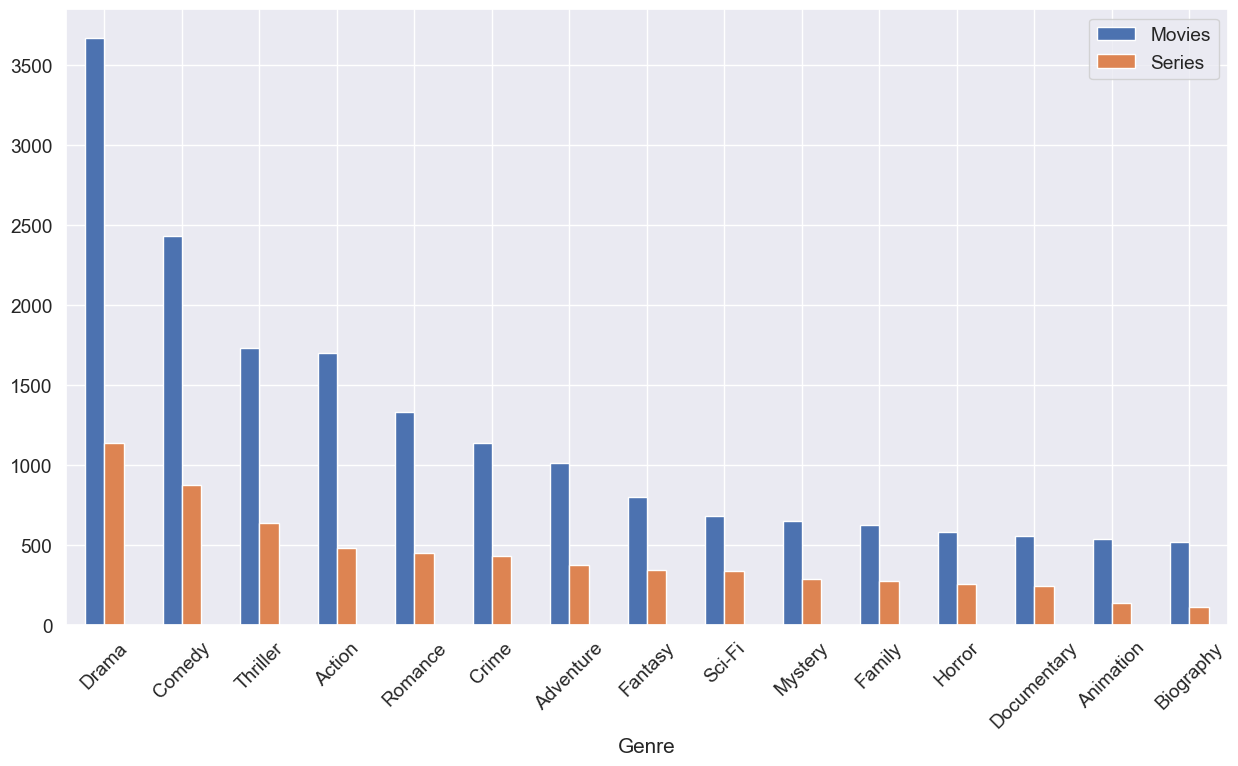

In [24]:
plt.figure()
gr_gen_movies.head(15).plot(x='Genre', kind="bar",figsize=(15, 8))
plt.xticks(rotation=45)
plt.show()

In [21]:
    genres = s.unique()
    genres = genres[:15]

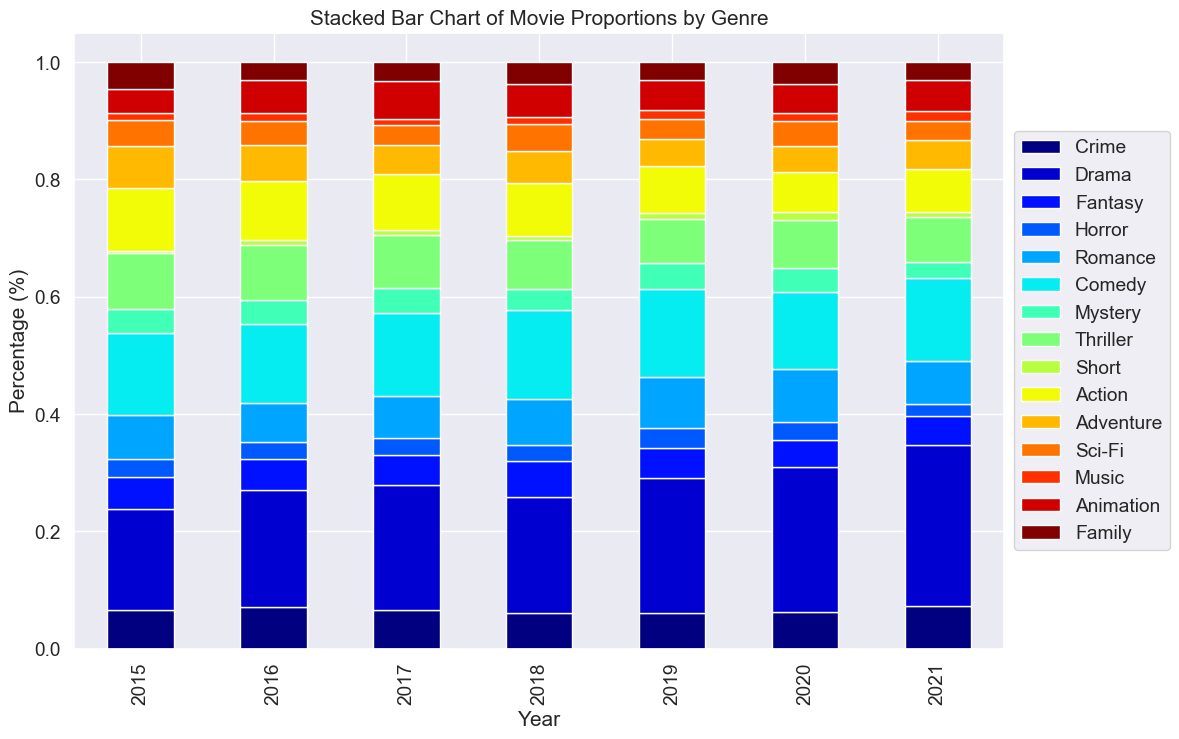

In [24]:
gen_df['year'] = gen_df[gen_df['year'] != 'NaT']['year'].astype(int)

pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2015) & (gen_df['year'] <= 2021)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

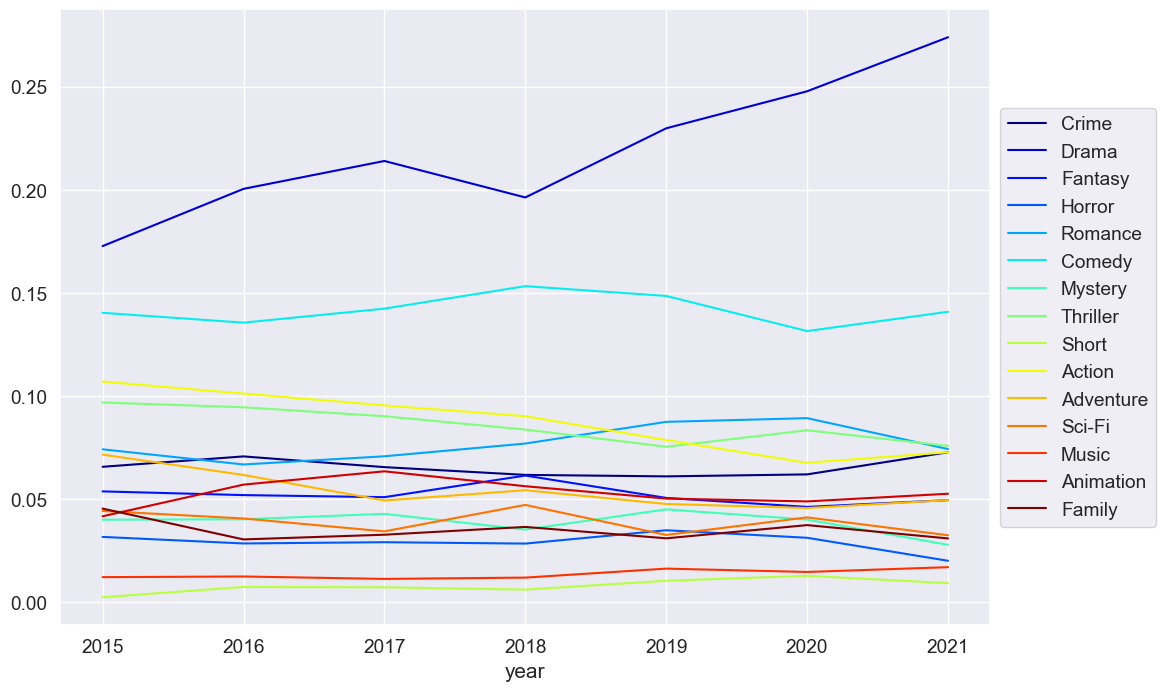

In [23]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Production House

In [39]:
df[df['Production House'].isnull()].shape

(5032, 32)

In [40]:
df['PH'] = df['Production House']

In [41]:
df['PH'] = df['PH'].str.replace(" ", "")
df['PH']

0                        Canal+,SandrewMetronome
1             Film4,MonumentalPictures,Lionsgate
2                                            NaN
3                                            NaN
4                                            NaN
                          ...                   
9420    RevolutionStudios,ThirteenProductionsLLC
9421                                         NaN
9422                                         NaN
9423                                         NaN
9424                                         NaN
Name: PH, Length: 9425, dtype: object

In [42]:
df['PH'] = df['PH'].fillna('Other')
ph = df['PH'].str.split(',', expand=True).values.tolist()

In [43]:
for i in range(len(ph)):
    df['PH'][i] = ph[i]
df['PH']

0       [Canal+, SandrewMetronome, None, None, None, N...
1       [Film4, MonumentalPictures, Lionsgate, None, N...
2       [Other, None, None, None, None, None, None, No...
3       [Other, None, None, None, None, None, None, No...
4       [Other, None, None, None, None, None, None, No...
                              ...                        
9420    [RevolutionStudios, ThirteenProductionsLLC, No...
9421    [Other, None, None, None, None, None, None, No...
9422    [Other, None, None, None, None, None, None, No...
9423    [Other, None, None, None, None, None, None, No...
9424    [Other, None, None, None, None, None, None, No...
Name: PH, Length: 9425, dtype: object

In [44]:
s = df.apply(lambda x: pd.Series(x['PH']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'ph'

In [45]:
ph_df = df.drop('PH', axis=1).join(s)

In [46]:
ph_gen = pd.DataFrame(ph_df['ph'].value_counts()).reset_index()
ph_gen.columns = ['PH', 'movies']
ph_gen = ph_gen.drop(0)
ph_gen.head(10)

,PH,movies
1,UniversalPictures,138
2,ParamountPictures,137
3,Netflix,92
4,WarnerBrothers,90
5,WarnerBros.,80
6,ColumbiaPicturesCorporation,74
7,NewLineCinema,69
8,ColumbiaPictures,61
9,WorkingTitleFilms,48
10,TriStarPictures,45


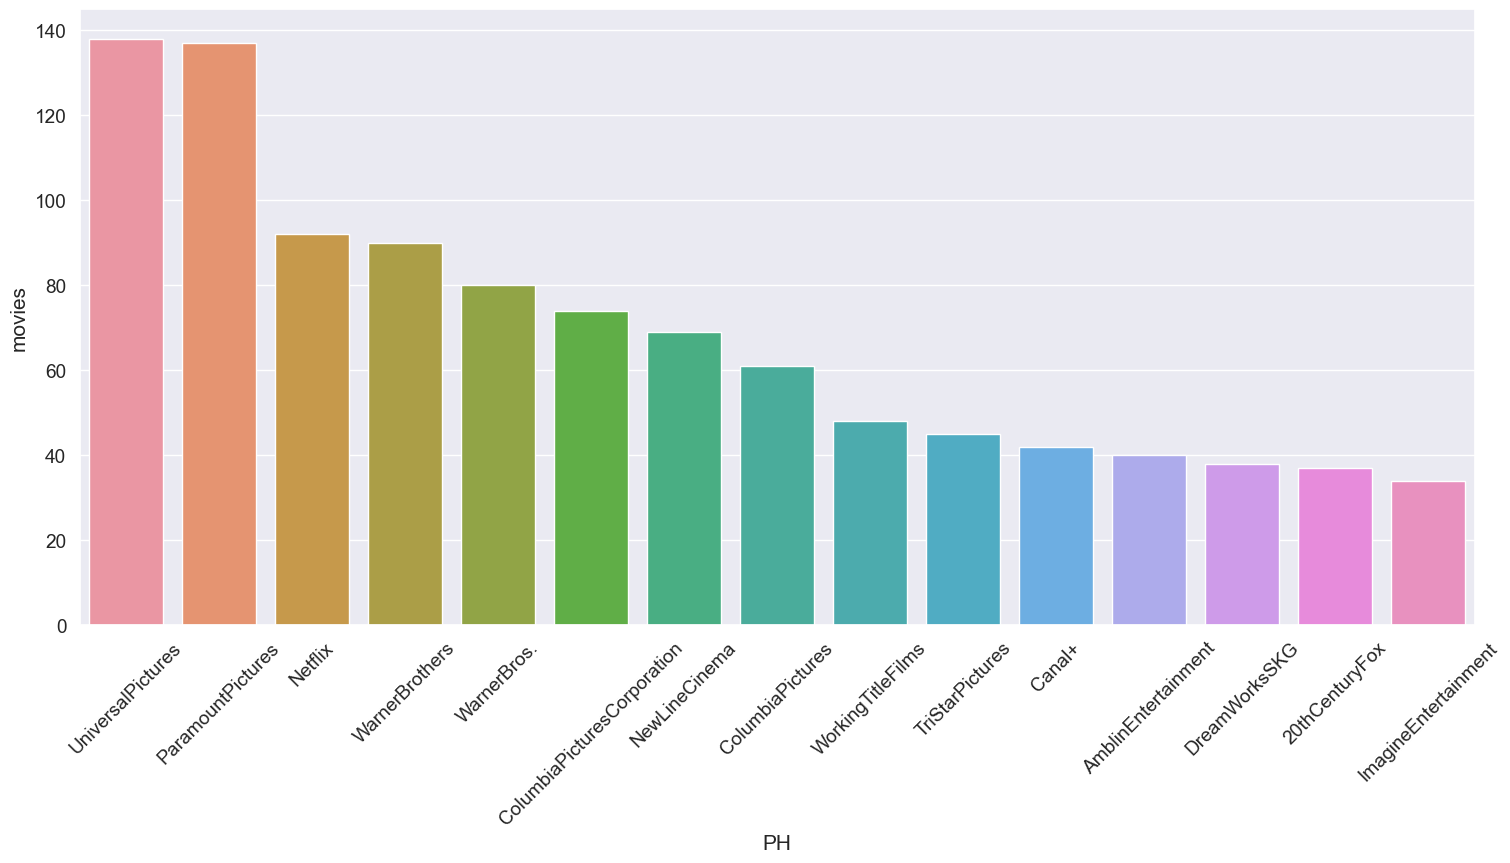

In [47]:
plt.figure(figsize=(18,8))
sns.barplot(x='PH', y='movies', data=ph_gen.head(15))
plt.xticks(rotation=45)
plt.show()

<Figure size 640x480 with 0 Axes>

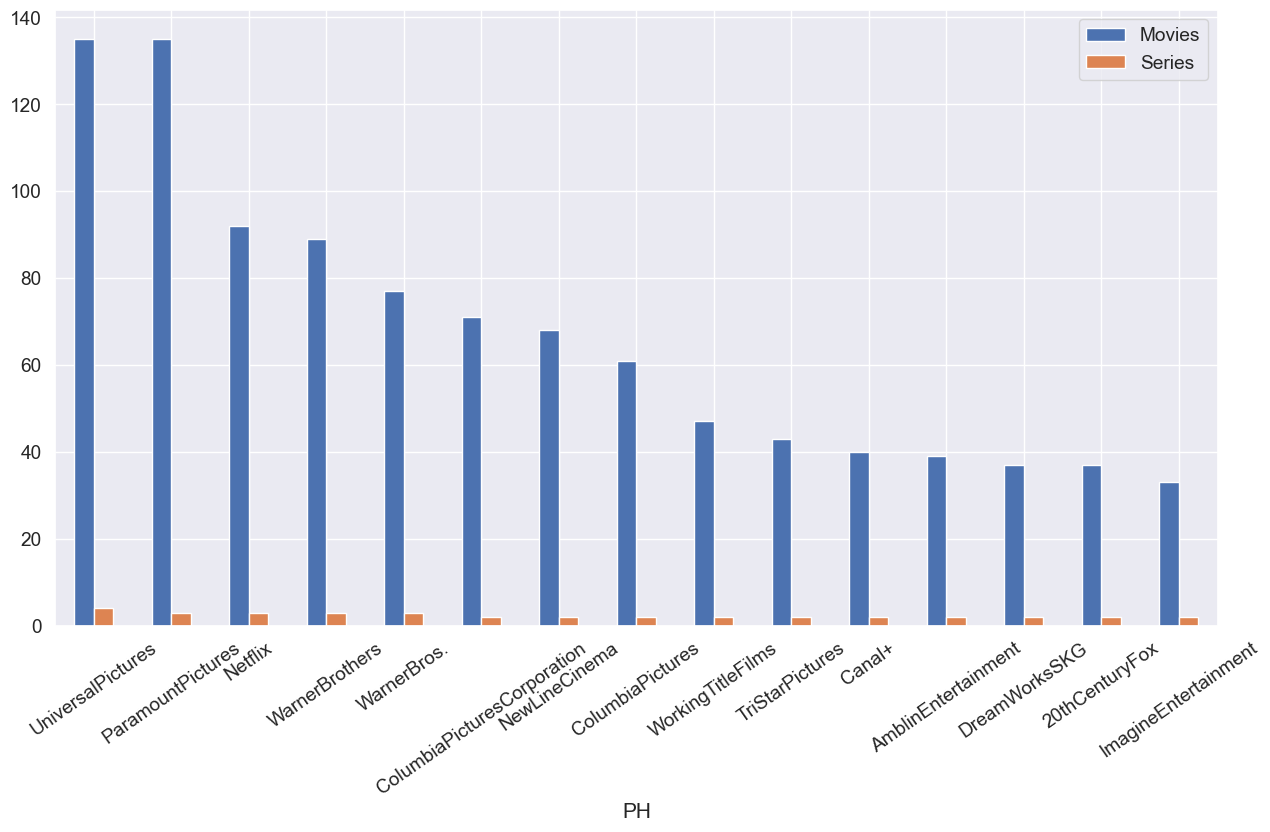

In [57]:
df_series = df[(df['Series or Movie']=='Series')]
df_movies = df[(df['Series or Movie']=='Movie')]

gen_df_series = df_series.drop('PH', axis=1).join(s)
gr_gen_series = pd.DataFrame(gen_df_series['ph'].value_counts()).reset_index()
gr_gen_series.columns = ['PH', 'Series']

gen_df_movies = df_movies.drop('PH', axis=1).join(s)
gr_gen_movies = pd.DataFrame(gen_df_movies['ph'].value_counts()).reset_index()
gr_gen_movies.columns = ['PH', 'Movies']

gr_gen_movies['Series'] = gr_gen_series['Series']

gr_gen_movies = gr_gen_movies.drop(0)

plt.figure()
gr_gen_movies.head(15).plot(x='PH', kind="bar",figsize=(15, 8))
plt.xticks(rotation=35)
plt.show()

## Most Language

In [58]:
df[df['Languages'].isnull()].shape

(159, 33)

In [59]:
df['Languages'] = df['Languages'].str.replace(" ", "")
df['Languages']

0          Swedish,Spanish
1                  English
2                     Thai
3                   Polish
4                  Swedish
               ...        
9420    English,Portuguese
9421               English
9422               English
9423                 Dutch
9424               English
Name: Languages, Length: 9425, dtype: object

In [60]:
df['Languages'] = df['Languages'].fillna('Other')
lan = df['Languages'].str.split(',', expand=True).values.tolist()

In [61]:
for i in range(len(lan)):
    df['Languages'][i] = lan[i]
df['Languages']

0       [Swedish, Spanish, None, None, None, None, Non...
1       [English, None, None, None, None, None, None, ...
2       [Thai, None, None, None, None, None, None, Non...
3       [Polish, None, None, None, None, None, None, N...
4       [Swedish, None, None, None, None, None, None, ...
                              ...                        
9420    [English, Portuguese, None, None, None, None, ...
9421    [English, None, None, None, None, None, None, ...
9422    [English, None, None, None, None, None, None, ...
9423    [Dutch, None, None, None, None, None, None, No...
9424    [English, None, None, None, None, None, None, ...
Name: Languages, Length: 9425, dtype: object

In [62]:
s = df.apply(lambda x: pd.Series(x['Languages']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'languages'

In [63]:
lan_df = df.drop('Languages', axis=1).join(s)

In [67]:
lan_gen = pd.DataFrame(lan_df['languages'].value_counts()).reset_index()
lan_gen.columns = ['Languages', 'Movies']
lan_gen.head(10)

,Languages,Movies
0,English,6170
1,Japanese,1177
2,Spanish,837
3,French,801
4,Korean,562
5,German,489
6,Hindi,349
7,Mandarin,335
8,Italian,312
9,Russian,278


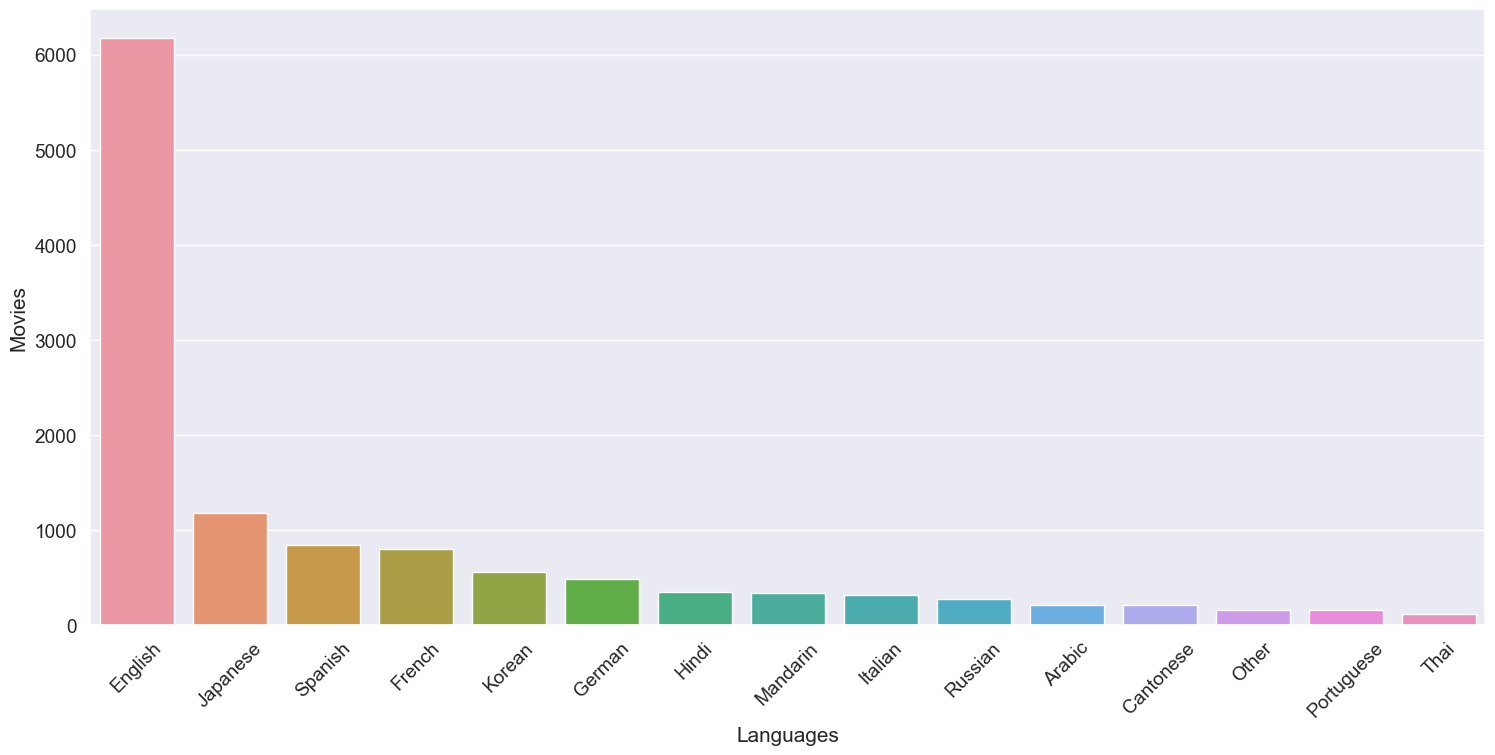

In [65]:
plt.figure(figsize=(18,8))
sns.barplot(x='Languages', y='Movies', data=lan_gen.head(15))
plt.xticks(rotation=45)
plt.show()

## Country Avaibility

In [68]:
df[df['Country Availability'].isnull()].shape

(11, 33)

In [69]:
df['Country Availability']

0                                                Thailand
1                                                  Canada
2                                                Thailand
3                                                  Poland
4       Lithuania,Poland,France,Italy,Spain,Greece,Bel...
                              ...                        
9420    Hungary,Lithuania,Romania,United Kingdom,Belgi...
9421    Hungary,Lithuania,India,Australia,United Kingd...
9422                                            Australia
9423                                              Belgium
9424    Belgium,Switzerland,United States,Germany,Unit...
Name: Country Availability, Length: 9425, dtype: object

In [70]:
df['Country Availability'] = df['Country Availability'].fillna('Other')
country = df['Country Availability'].str.split(',', expand=True).values.tolist()

In [71]:
for i in range(len(country)):
    df['Country Availability'][i] = country[i]
df['Country Availability']

0       [Thailand, None, None, None, None, None, None,...
1       [Canada, None, None, None, None, None, None, N...
2       [Thailand, None, None, None, None, None, None,...
3       [Poland, None, None, None, None, None, None, N...
4       [Lithuania, Poland, France, Italy, Spain, Gree...
                              ...                        
9420    [Hungary, Lithuania, Romania, United Kingdom, ...
9421    [Hungary, Lithuania, India, Australia, United ...
9422    [Australia, None, None, None, None, None, None...
9423    [Belgium, None, None, None, None, None, None, ...
9424    [Belgium, Switzerland, United States, Germany,...
Name: Country Availability, Length: 9425, dtype: object

In [72]:
s = df.apply(lambda x: pd.Series(x['Country Availability']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'country'

In [73]:
count_df = df.drop('Country Availability', axis=1).join(s)

In [74]:
count_gen = pd.DataFrame(count_df['country'].value_counts()).reset_index()
count_gen.columns = ['Countries', 'Movies']
count_gen = count_gen.drop(36)
count_gen

,Countries,Movies
0,United Kingdom,3908
1,Czech Republic,3836
2,Japan,3802
3,Hungary,3741
4,Canada,3711
5,India,3675
6,Singapore,3666
7,Thailand,3649
8,Romania,3642
9,Australia,3624


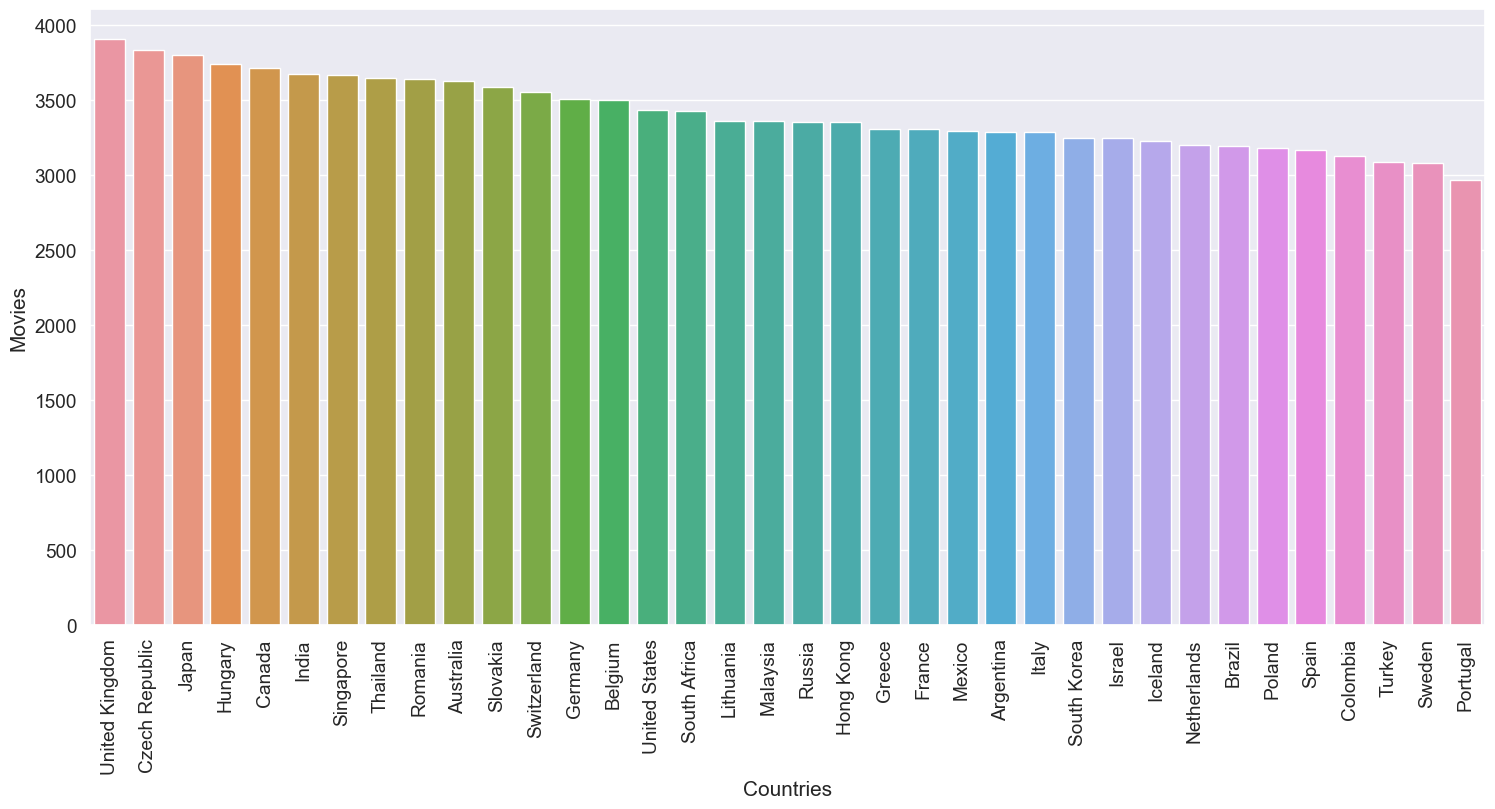

In [75]:
plt.figure(figsize=(18,8))
sns.barplot(x='Countries', y='Movies', data=count_gen)
plt.xticks(rotation=90)
plt.show()

## Cast

In [91]:
df[df['Actors'].isnull()].shape

(111, 34)

In [92]:
df['Actors'] = df['Actors'].str.replace(" ", "")
df['Actors']

0       LinaLeandersson,KåreHedebrant,PerRagnar,Henrik...
1           Cleo,PaddyConsidine,BeanieFeldstein,DónalFinn
2       KathaleeyaMcIntosh,NadechKugimiya,PimchanokLeu...
3       KatarzynaMaciag,PiotrNowak,MarcinDorocinski,Ju...
4             HugoBjörne,EvaDahlbeck,UlfPalme,RagnarFalck
                              ...                        
9420      AndySerkis,JenniferGarner,MarkRuffalo,JudyGreer
9421                                         TeasaCopprue
9422    RyuichiSakamoto,ClemBurke,AnnieLennox,PatrickS...
9423                                         DaniëlArends
9424                                          JungHyunKim
Name: Actors, Length: 9425, dtype: object

In [93]:
df['Actors'] = df['Actors'].fillna('Other')
act = df['Actors'].str.split(',', expand=True).values.tolist()

In [94]:
for i in range(len(act)):
    df['Actors'][i] = act[i]
df['Actors']

0       [LinaLeandersson, KåreHedebrant, PerRagnar, He...
1       [Cleo, PaddyConsidine, BeanieFeldstein, DónalF...
2       [KathaleeyaMcIntosh, NadechKugimiya, Pimchanok...
3       [KatarzynaMaciag, PiotrNowak, MarcinDorocinski...
4        [HugoBjörne, EvaDahlbeck, UlfPalme, RagnarFalck]
                              ...                        
9420    [AndySerkis, JenniferGarner, MarkRuffalo, Judy...
9421                     [TeasaCopprue, None, None, None]
9422    [RyuichiSakamoto, ClemBurke, AnnieLennox, Patr...
9423                     [DaniëlArends, None, None, None]
9424                      [JungHyunKim, None, None, None]
Name: Actors, Length: 9425, dtype: object

In [95]:
s = df.apply(lambda x: pd.Series(x['Actors']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'cast'

In [96]:
act_df = df.drop('Actors', axis=1).join(s)

In [97]:
act_gen = pd.DataFrame(act_df['cast'].value_counts()).reset_index()
act_gen.columns = ['Casts', 'Movies']
act_gen = act_gen.drop(0)
act_gen.head(10)

,Casts,Movies
1,LiamNeeson,37
2,RobertDeNiro,35
3,JackieChan,34
4,AdamSandler,33
5,EwanMcGregor,33
6,BruceWillis,32
7,MarkWahlberg,32
8,SamuelL.Jackson,30
9,ShahRukhKhan,28
10,NataliePortman,27


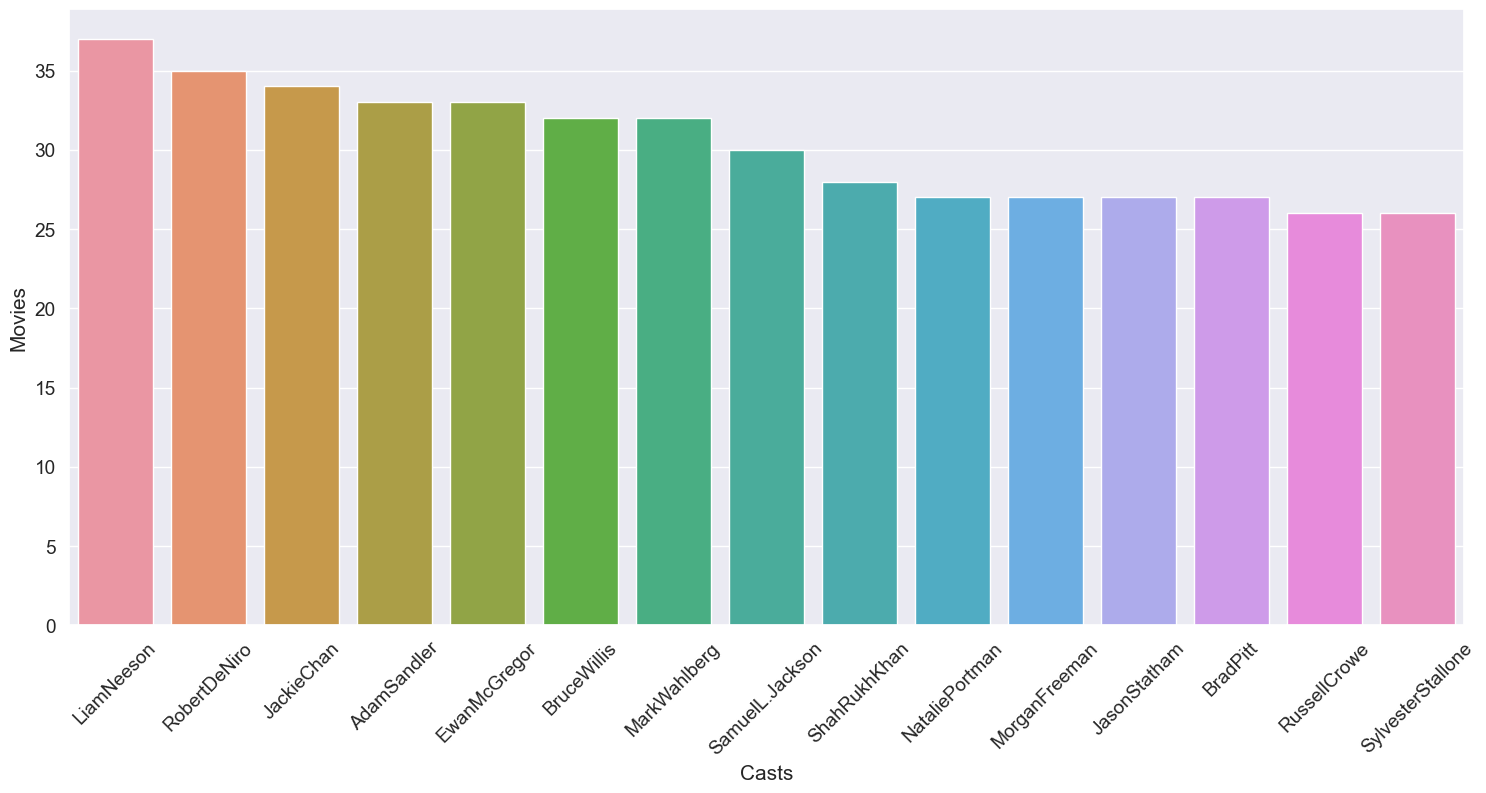

In [98]:
plt.figure(figsize=(18,8))
sns.barplot(x='Casts', y='Movies', data=act_gen.head(15))
plt.xticks(rotation=45)
plt.show()

## Runtime

In [99]:
df[df['Runtime'].isnull()].shape

(1, 34)

In [100]:
df['Runtime']

0       < 30 minutes
1           1-2 hour
2            > 2 hrs
3       < 30 minutes
4           1-2 hour
            ...     
9420        1-2 hour
9421        1-2 hour
9422        1-2 hour
9423        1-2 hour
9424    < 30 minutes
Name: Runtime, Length: 9425, dtype: object

In [101]:
run_df = pd.DataFrame(df['Runtime'].value_counts())
run_df.columns = ['Number']
run_df

,Number
1-2 hour,5230
< 30 minutes,2507
> 2 hrs,1551
30-60 mins,136


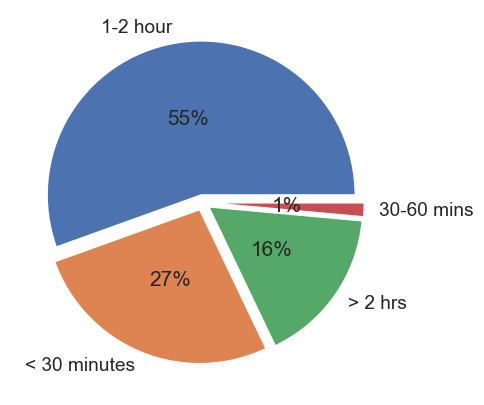

In [102]:
plt.figure(figsize=(12,5))
plt.pie(x=run_df['Number'], labels=run_df.index, autopct='%.0f%%', explode=[0.05]*4, pctdistance=0.5)
plt.show()

## Release Date

In [103]:
df[df['Netflix Release Date'].isnull()].shape

(0, 34)

<AxesSubplot:xlabel='year'>

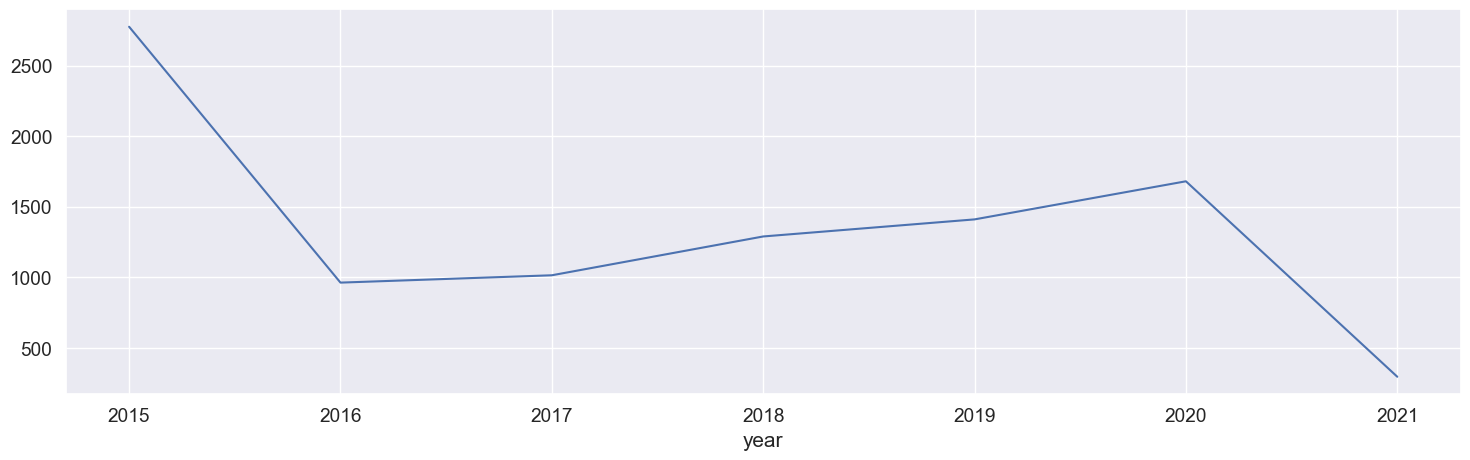

In [104]:
year_count = df.groupby('year')['Title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [105]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [106]:
def rem_time(d):
    s = ''
    s = str(d.year) + '-' + str(d.month) + '-' + str(d.day)
    return s

def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
    
def get_day(x):
    try:
        x = rem_time(x)
        year, month, day = (int(i) for i in x.split('-'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [107]:
df['Day'] = df['Netflix Release Date'].apply(get_day)
df['Month'] = df['Netflix Release Date'].apply(get_month)

Text(0, 0.5, 'Number')

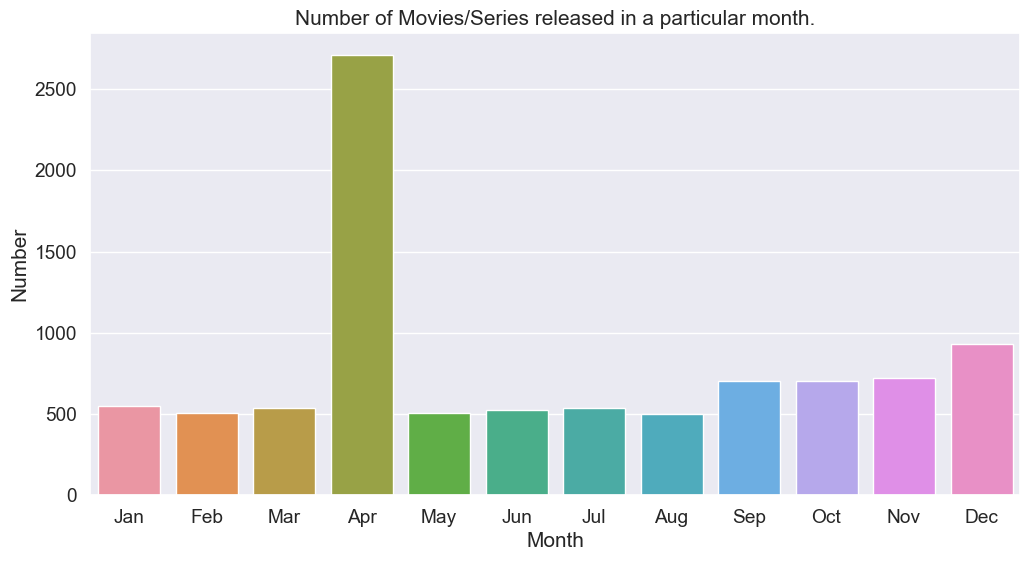

In [108]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies/Series released in a particular month.")
sns.countplot(x='Month', data=df, order=month_order)
plt.ylabel('Number')

Text(0, 0.5, 'Number')

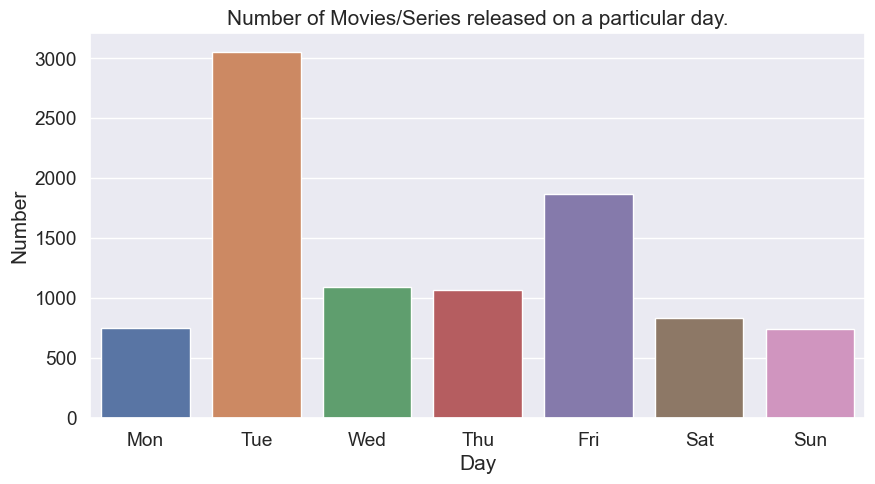

In [109]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies/Series released on a particular day.")
sns.countplot(x='Day', data=df, order=day_order)
plt.ylabel('Number')

In [37]:
df[df['year'] != 'NaT'][['Title', 'year']].sort_values('year', ascending=False).head(10)

,Title,year
0,Lets Fight Ghost,2021
203,Radium Girls,2021
201,Sluzby specjalne,2021
200,UnAvventura,2021
199,Daughter From Another Mother,2021
198,Affliction,2021
197,Im Home,2021
196,Cromartie High School,2021
195,Cut Throat City,2021
194,Dinner With Friends,2021


In [38]:
df[df['year'] != 'NaT'][['Title', 'year']].sort_values('year', ascending=True).head(10)

,Title,year
9424,DreamWorks Happy Holidays from Madagascar,2015
7577,The Roommate,2015
7576,Safe,2015
7575,The Sitter,2015
7574,Serenity,2015
7573,Spanglish,2015
7572,Senna,2015
7571,Takers,2015
7570,Under the Skin,2015
7569,Diaz: Dont Clean Up This Blood,2015


# Popularity

In [77]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [78]:
df['IMDb Votes'] = df['IMDb Votes'].apply(clean_numeric).astype('float')
df['IMDb Score'] = df['IMDb Score'].apply(clean_numeric).astype('float')

## Top Votes

In [114]:
df[['Title', 'Series or Movie' ,'Genre', 'IMDb Score', 'IMDb Votes', 'year']].sort_values('IMDb Votes', ascending=False).head(10)

,Title,Series or Movie,Genre,IMDb Score,IMDb Votes,year
8650,The Shawshank Redemption,Movie,Drama,9.3,2354197.0,2015
8514,The Dark Knight,Movie,"Action, Crime, Drama, Thriller",9.0,2308981.0,2015
8381,Inception,Movie,"Action, Adventure, Sci-Fi, Thriller",8.8,2072912.0,2015
511,Fiction.,Movie,"Crime, Drama",8.9,1831004.0,2020
9090,Pulp Fiction,Movie,"Crime, Drama",8.9,1831004.0,2015
8713,Forrest Gump,Movie,"Drama, Romance",8.8,1814709.0,2015
8343,The Matrix,Movie,"Action, Sci-Fi",8.7,1684368.0,2015
8414,The Lord of the Rings: The Fellowship of the Ring,Movie,"Action, Adventure, Drama, Fantasy",8.8,1664865.0,2015
9114,The Lord of the Rings: The Return of the King,Movie,"Action, Adventure, Drama, Fantasy",8.9,1645871.0,2015
8724,The Godfather,Movie,"Crime, Drama",9.2,1625286.0,2015


## Top Ratings

In [115]:
df[['Title', 'Series or Movie', 'Genre', 'IMDb Score', 'IMDb Votes', 'year']].sort_values('IMDb Score', ascending=False).head(10)

,Title,Series or Movie,Genre,IMDb Score,IMDb Votes,year
187,No Festival,Movie,"Documentary, Music",9.7,49.0,2021
9366,Breaking Bad,Series,"Crime, Drama, Thriller",9.5,1469976.0,2015
1351,Flavours of Romania,Series,Documentary,9.5,365.0,2020
135,The Dream House,Movie,"Comedy, Drama, Fantasy",9.4,7.0,2021
2975,Our Planet,Series,Documentary,9.3,32985.0,2019
8650,The Shawshank Redemption,Movie,Drama,9.3,2354197.0,2015
6320,Rick and Morty,Series,"Animation, Adventure, Comedy, Sci-Fi",9.2,375398.0,2016
8724,The Godfather,Movie,"Crime, Drama",9.2,1625286.0,2015
3812,Conspiracy,Movie,"Documentary, Short",9.2,16.0,2018
3806,Im Sorry,Series,Documentary,9.2,25.0,2018


## Score Ratio

In [116]:
df['Score Ratio'] = df['IMDb Votes'] / df['IMDb Score']
df[['Title', 'Series or Movie', 'IMDb Score', 'IMDb Votes', 'Score Ratio', 'year']].sort_values('Score Ratio', ascending=False).head(10)

,Title,Series or Movie,IMDb Score,IMDb Votes,Score Ratio,year
8514,The Dark Knight,Movie,9.0,2308981.0,256553.444444,2015
8650,The Shawshank Redemption,Movie,9.3,2354197.0,253139.462366,2015
8381,Inception,Movie,8.8,2072912.0,235558.181818,2015
8713,Forrest Gump,Movie,8.8,1814709.0,206216.931818,2015
9090,Pulp Fiction,Movie,8.9,1831004.0,205730.786517,2015
511,Fiction.,Movie,8.9,1831004.0,205730.786517,2020
8343,The Matrix,Movie,8.7,1684368.0,193605.517241,2015
8414,The Lord of the Rings: The Fellowship of the Ring,Movie,8.8,1664865.0,189189.204545,2015
9114,The Lord of the Rings: The Return of the King,Movie,8.9,1645871.0,184929.325843,2015
7534,The Dark Knight Rises,Movie,8.4,1522306.0,181226.904762,2015


<AxesSubplot:xlabel='IMDb Score', ylabel='Density'>

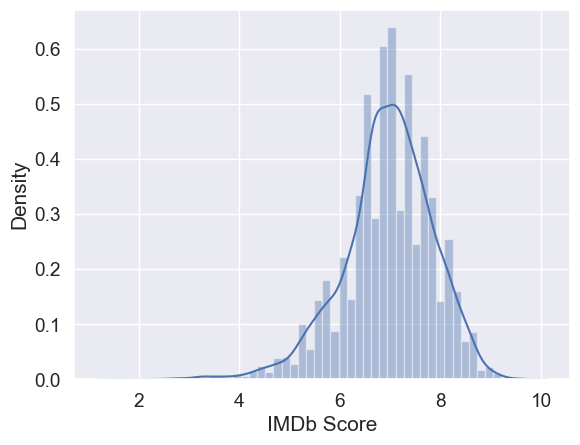

In [30]:
sns.distplot(df['IMDb Score'].fillna(df['IMDb Score'].median()))

## Most Popular (All)

In [118]:
df[df['Score Ratio'] > 100000][['Title', 'Series or Movie', 'IMDb Score', 'IMDb Votes', 'Score Ratio','year']].sort_values('IMDb Score', ascending=False).head(10)

,Title,Series or Movie,IMDb Score,IMDb Votes,Score Ratio,year
9366,Breaking Bad,Series,9.5,1469976.0,154734.315789,2015
8650,The Shawshank Redemption,Movie,9.3,2354197.0,253139.462366,2015
8724,The Godfather,Movie,9.2,1625286.0,176661.521739,2015
8833,The Godfather: Part II,Movie,9.0,1133063.0,125895.888889,2015
8514,The Dark Knight,Movie,9.0,2308981.0,256553.444444,2015
9114,The Lord of the Rings: The Return of the King,Movie,8.9,1645871.0,184929.325843,2015
511,Fiction.,Movie,8.9,1831004.0,205730.786517,2020
9090,Pulp Fiction,Movie,8.9,1831004.0,205730.786517,2015
8647,Schindlers List,Movie,8.9,1216661.0,136703.483146,2015
8713,Forrest Gump,Movie,8.8,1814709.0,206216.931818,2015


## Most Popular Movies

In [32]:
df[(df['Score Ratio'] > 100000) & (df['Series or Movie']=='Movie')][['Title', 'Series or Movie', 'IMDb Score', 'IMDb Votes', 'Score Ratio','year']].sort_values('IMDb Score', ascending=False).head(10)

,Title,Series or Movie,IMDb Score,IMDb Votes,Score Ratio,year
8650,The Shawshank Redemption,Movie,9.3,2354197.0,253139.462366,2015
8724,The Godfather,Movie,9.2,1625286.0,176661.521739,2015
8514,The Dark Knight,Movie,9.0,2308981.0,256553.444444,2015
8833,The Godfather: Part II,Movie,9.0,1133063.0,125895.888889,2015
511,Fiction.,Movie,8.9,1831004.0,205730.786517,2020
9114,The Lord of the Rings: The Return of the King,Movie,8.9,1645871.0,184929.325843,2015
9090,Pulp Fiction,Movie,8.9,1831004.0,205730.786517,2015
8647,Schindlers List,Movie,8.9,1216661.0,136703.483146,2015
8381,Inception,Movie,8.8,2072912.0,235558.181818,2015
8414,The Lord of the Rings: The Fellowship of the Ring,Movie,8.8,1664865.0,189189.204545,2015


##  Most Popular Series

In [33]:
df[(df['Score Ratio'] > 10000) & (df['Series or Movie']=='Series')][['Title', 'Series or Movie', 'IMDb Score', 'IMDb Votes', 'Score Ratio','year']].sort_values('IMDb Score', ascending=False).head(10)

,Title,Series or Movie,IMDb Score,IMDb Votes,Score Ratio,year
9366,Breaking Bad,Series,9.5,1469976.0,154734.315789,2015
9350,Avatar: The Last Airbender,Series,9.2,248384.0,26998.260870,2015
6320,Rick and Morty,Series,9.2,375398.0,40804.130435,2016
8890,Sherlock,Series,9.1,807412.0,88726.593407,2015
8140,Fullmetal Alchemist: Brotherhood,Series,9.1,121607.0,13363.406593,2015
9159,Death Note,Series,9.0,239102.0,26566.888889,2015
8632,The Office (U.S.),Series,8.9,413679.0,46480.786517,2015
8064,Attack on Titan,Series,8.9,198575.0,22311.797753,2015
2748,When They See Us,Series,8.9,92968.0,10445.842697,2019
9099,Friends,Series,8.9,828187.0,93054.719101,2015


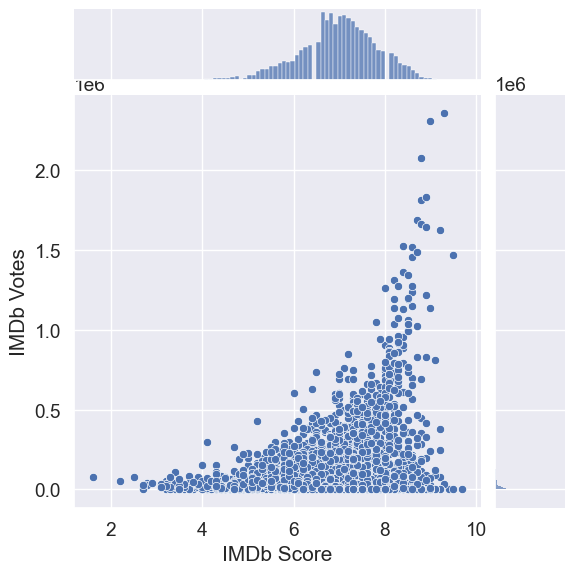

In [34]:
sns.jointplot(x='IMDb Score', y='IMDb Votes', data=df)

# Revenue

## Most Revenue

In [82]:
df[df['Boxoffice'].notnull()][['Title', 'Series or Movie', 'Boxoffice', 'Production House', 'IMDb Votes', 'IMDb Score', 'Score Ratio', 'year']].sort_values('Boxoffice', ascending=False).head(10)

,Title,Series or Movie,Boxoffice,Production House,IMDb Votes,IMDb Score,Score Ratio,year
7830,Titanic,Movie,659363944.0,"20th Century Fox, Lightstorm Entertainment, Pa...",1048704.0,7.8,134449.230769,2015
5695,Jurassic World,Movie,652385625.0,"Amblin Entertainment, Universal Pictures, Lege...",580133.0,7.0,82876.142857,2016
8261,Avengers Assemble,Movie,623357910.0,Marvel Studios,1263208.0,8.0,157901.000000,2015
8514,The Dark Knight,Movie,534858444.0,Syncopy,2308981.0,9.0,256553.444444,2015
1447,Im No Longer Here,Movie,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2020
197,Im Home,Series,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2021
1112,Id like to Borrow a Girlfriend,Series,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2020
936,Im Thinking of Ending Things,Movie,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2020
6580,Im Brent Morin,Movie,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2015
582,Im Standing on a Million Lives,Series,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2020


In [83]:
df[df['Boxoffice'].notnull()][['Title', 'Series or Movie', 'Boxoffice', 'Production House', 'IMDb Votes', 'IMDb Score', 'Score Ratio', 'year']].sort_values('Boxoffice', ascending=False).drop_duplicates(subset='Boxoffice', keep='first', inplace=False, ignore_index=False).head(10)

,Title,Series or Movie,Boxoffice,Production House,IMDb Votes,IMDb Score,Score Ratio,year
7830,Titanic,Movie,659363944.0,"20th Century Fox, Lightstorm Entertainment, Pa...",1048704.0,7.8,134449.230769,2015
5695,Jurassic World,Movie,652385625.0,"Amblin Entertainment, Universal Pictures, Lege...",580133.0,7.0,82876.142857,2016
8261,Avengers Assemble,Movie,623357910.0,Marvel Studios,1263208.0,8.0,157901.000000,2015
8514,The Dark Knight,Movie,534858444.0,Syncopy,2308981.0,9.0,256553.444444,2015
1447,Im No Longer Here,Movie,474544677.0,Lucasfilm Ltd.,733336.0,6.5,112820.923077,2020
6548,Avengers: Age of Ultron,Movie,459005868.0,Marvel Studios,748735.0,7.3,102566.438356,2015
7534,The Dark Knight Rises,Movie,448139099.0,Syncopy,1522306.0,8.4,181226.904762,2015
7145,E.T. the Extra-Terrestrial,Movie,435110554.0,Universal Pictures,373277.0,7.8,47856.025641,2015
9187,The Hunger Games: Catching Fire,Movie,424668047.0,"Color Force, Lionsgate Films",614621.0,7.5,81949.466667,2015
2981,Jurassic World: Fallen Kingdom,Movie,417719760.0,"The Kennedy/Marshall Company, Universal Pictur...",267185.0,6.2,43094.354839,2019


## Least Revenue

In [119]:
    df[df['Boxoffice'].notnull()][['Title', 'Series or Movie', 'Boxoffice', 'Production House', 'IMDb Votes', 'IMDb Score', 'Score Ratio', 'year']].sort_values('Boxoffice', ascending=True).head(10)

,Title,Series or Movie,Boxoffice,Production House,IMDb Votes,IMDb Score,Score Ratio,year
8092,Storage 24,Movie,72.0,NaN,6686.0,4.5,1485.777778,2015
3704,02:22:00,Movie,422.0,"Lightstream Entertainment, Screen Australia, P...",20238.0,5.8,3489.310345,2018
1567,Two English Girls,Movie,509.0,NaN,4893.0,7.3,670.273973,2020
1575,Love on the Run,Movie,509.0,NaN,6160.0,7.1,867.605634,2020
1568,The 400 Blows,Movie,509.0,Les Films du Carrosse,105730.0,8.1,13053.086420,2020
1574,Fahrenheit 451,Movie,509.0,"Anglo Enterprises, Vineyard",41244.0,7.2,5728.333333,2020
1572,The Soft Skin,Movie,509.0,NaN,6910.0,7.5,921.333333,2020
1571,The Woman Next Door,Movie,509.0,NaN,7363.0,7.3,1008.630137,2020
2672,Jules and Jim,Movie,509.0,Les Films du Carrosse,37740.0,7.8,4838.461538,2019
1576,Confidentially Yours,Movie,509.0,"Les Films du Carrosse, Soprofilms [fr], Films A2",5976.0,7.2,830.000000,2020


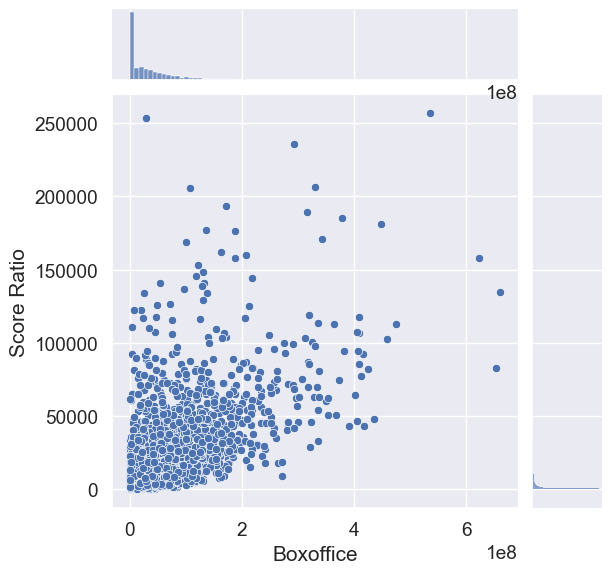

In [85]:
sns.jointplot(x='Boxoffice',y='Score Ratio',data=df)

In [140]:
data = df[df['Boxoffice'].notnull()][['Boxoffice','Score Ratio']]
data.corr()

,Boxoffice,Score Ratio
Boxoffice,1.000000,0.677247
Score Ratio,0.677247,1.000000


## Total Revenue per Year

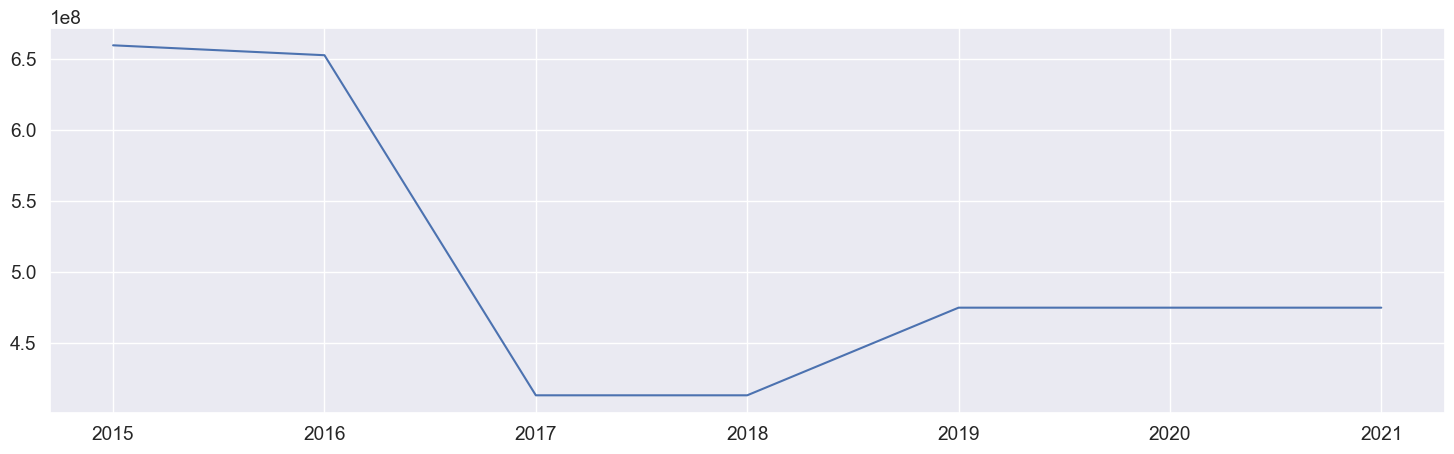

In [86]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['Boxoffice'].notnull()) & (df['year'] != 'NaT')].groupby('year')['Boxoffice'].max()
plt.plot(year_revenue.index, year_revenue)
plt.show()

## Production House Most Revenue

In [87]:
com_sum = pd.DataFrame(ph_df.groupby('ph')['Boxoffice'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(ph_df.groupby('ph')['Boxoffice'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(ph_df.groupby('ph')['Boxoffice'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [88]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
ph,,,
ParamountPictures,1.166659e+10,8.905792e+07,131
UniversalPictures,1.166008e+10,8.833395e+07,132
WarnerBros.,6.910657e+09,9.214209e+07,75
WarnerBrothers,6.806253e+09,8.007356e+07,85
LucasfilmLtd.,6.765563e+09,3.758646e+08,18
AmblinEntertainment,5.868983e+09,1.467246e+08,40
NewLineCinema,5.464645e+09,7.919776e+07,69
ColumbiaPictures,5.068808e+09,8.309522e+07,61
DreamWorksSKG,4.328863e+09,1.139175e+08,38


## Most Revenue by Cast

In [110]:
act_gen = pd.DataFrame(act_df['cast'].value_counts()).reset_index()
act_gen.columns = ['Casts', 'Movies']
act_gen = act_gen.drop(0)
act_gen.head(10)

,Casts,Movies
1,LiamNeeson,37
2,RobertDeNiro,35
3,JackieChan,34
4,AdamSandler,33
5,EwanMcGregor,33
6,BruceWillis,32
7,MarkWahlberg,32
8,SamuelL.Jackson,30
9,ShahRukhKhan,28
10,NataliePortman,27


In [111]:
actor_list = act_df.groupby('cast')['Boxoffice'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)

act_sum = pd.DataFrame(act_df.groupby('cast')['Boxoffice'].sum().sort_values(ascending=False))
act_sum.columns = ['Total']
act_mean = pd.DataFrame(act_df.groupby('cast')['Boxoffice'].mean().sort_values(ascending=False))
act_mean.columns = ['Average']
act_count = pd.DataFrame(act_df.groupby('cast')['Boxoffice'].count().sort_values(ascending=False))
act_count.columns = ['Number']

act_pivot = pd.concat((act_sum, act_mean, act_count), axis=1)

In [112]:
act_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
cast,,,
LiamNeeson,7.299096e+09,1.972729e+08,37
EwanMcGregor,6.336349e+09,2.043984e+08,31
NataliePortman,6.301442e+09,2.333867e+08,27
JakeLloyd,5.694536e+09,4.745447e+08,12
RobertDowneyJr.,3.655938e+09,2.150552e+08,17
WillSmith,3.261347e+09,1.482430e+08,22
TomHanks,3.132247e+09,1.252899e+08,25
TomCruise,2.816793e+09,1.280360e+08,22
RobertDeNiro,2.728235e+09,8.267379e+07,33
